## How do gladiators with different levels of patron wealth compare in terms of equipment quality and survival rates?


In [10]:
import pandas as pd 

file_path = '/Users/jacintocepedaquroz/the_gladiators/gladiator_data.csv'

gladiator_df = pd.read_csv(file_path)

gladiator_df.head()

,Name,Age,Birth Year,Origin,Height,Weight,Category,Wins,Losses,Special Skills,...,Battle Experience,Psychological Profile,Health Status,Personal Motivation,Previous Occupation,Training Intensity,Battle Strategy,Social Standing,Crowd Appeal Techniques,Survived
0,Novellius Probus,21,29,Gaul,180,74,Hoplomachus,4,1,Novice,...,5,Fearful,Excellent,Vengeance,Criminal,Medium,Balanced,Low,Humble,False
1,Baebius Geta,36,14,Numidia,174,80,Thraex,10,2,Novice,...,12,Fearful,Excellent,Freedom,Entertainer,Medium,Balanced,Medium,Charismatic,True
2,Rufius Gordian,29,21,Germania,157,94,Hoplomachus,6,2,Speed,...,8,Aggressive,Excellent,Glory,Unemployed,Medium,Aggressive,Medium,Charismatic,True
3,Pettius Appius,21,29,Greece,177,72,Thraex,7,1,Tactics,...,8,Stoic,Excellent,Glory,Laborer,Medium,Aggressive,Medium,Charismatic,True
4,Clodius Fundanus,26,24,Rome,178,104,Provocator,5,0,Novice,...,5,Calculative,Excellent,Wealth,Entertainer,Medium,Aggressive,Low,Intimidating,True


In [11]:
#List out column names to find the ones we would need

gladiator_df.columns

Index(['Name', 'Age', 'Birth Year', 'Origin', 'Height', 'Weight', 'Category',
       'Wins', 'Losses', 'Special Skills', 'Weapon of Choice', 'Patron Wealth',
       'Equipment Quality', 'Public Favor', 'Injury History',
       'Mental Resilience', 'Diet and Nutrition', 'Tactical Knowledge',
       'Allegiance Network', 'Battle Experience', 'Psychological Profile',
       'Health Status', 'Personal Motivation', 'Previous Occupation',
       'Training Intensity', 'Battle Strategy', 'Social Standing',
       'Crowd Appeal Techniques', 'Survived'],
      dtype='object')

In [12]:
#Verify data columns

df_1 = gladiator_df[['Equipment Quality','Patron Wealth', 'Survived']]

df_1.tail(50)

,Equipment Quality,Patron Wealth,Survived
107414,Standard,Medium,False
107415,Standard,Medium,True
107416,Superior,High,False
107417,Basic,Low,True
107418,Basic,Low,True
107419,Standard,Medium,False
107420,Standard,Medium,True
107421,Standard,Medium,False
107422,Standard,Medium,False
107423,Standard,Medium,True


In [13]:
#Proofs inequality in wealth leads to poor equipment quality

inequality = df_1.groupby(['Equipment Quality','Patron Wealth'])['Survived'].sum().unstack()

inequality

Patron Wealth,High,Low,Medium
Equipment Quality,,,
Basic,NaN,13396.0,NaN
Standard,NaN,NaN,17592.0
Superior,21892.0,NaN,NaN


In [14]:
#Isolate to only desire columns

isolated_df = df_1.groupby('Patron Wealth')['Survived'].mean()

isolated_df

Patron Wealth
High      0.612552
Low       0.373741
Medium    0.490274
Name: Survived, dtype: float64

In [15]:
import matplotlib.pyplot as plt

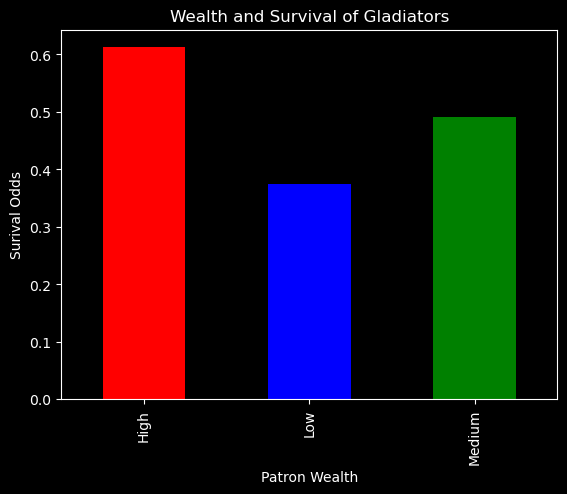

In [16]:
#Made my background color black
fig, ax =plt.subplots()
fig.patch.set_facecolor('black')
ax.set_facecolor('black')

#Created bar graph with the date
isolated_df.plot(kind='bar', color=['red','blue', 'green'], ax= ax)

#Customized my bar, text, and tick color for graph 
plt.xlabel('Patron Wealth', color= 'white')
plt.ylabel('Surival Odds', color= 'white')
plt.title('Wealth and Survival of Gladiators', color='white')
ax.tick_params(colors = 'white')
lines=('white')

#Made my axes(spines) white
for spine in ax.spines.values():
    spine.set_edgecolor('white')

plt.show()


In [17]:
#Exact numerical value of graph
equipment_df = df_1.groupby('Equipment Quality')['Survived'].mean().round(2)

equipment_df.head()

Equipment Quality
Basic       0.37
Standard    0.49
Superior    0.61
Name: Survived, dtype: float64

## Answer is yes patron wealth and equipment quality do impact Survival of Gladiator. 